In [8]:
from astropy.io import fits
import pandas as pd
import numpy as np
from PIL import Image

import random
import os
from matplotlib import pyplot as plt
from tqdm.autonotebook import tqdm
import gc 

plt.rcParams["figure.figsize"] = (20,20)

In [9]:
DIR_NO_SUB = "E:/GSOC/DeepLense/Test8/lenses/no_sub"
DIR_SUB = "E:/GSOC/DeepLense/Test8/lenses/sub"

In [15]:
def display_multi_images(directory, rows=3,columns=3,fig_size=None):
  if fig_size:
    fig = plt.figure(figsize=fig_size)
  else:
    fig = plt.figure()

  
  for i in range(1, columns*rows +1):
    fig_path = f"{directory}/{random.choice(os.listdir(directory))}"
    img = Image.open(fig_path)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
  plt.show()
  
def show_mean_image(directory):
  
  files = os.listdir(directory)
  mean_img = np.zeros((150,150))
  for i,img_name in tqdm(enumerate(files),desc="Read npy:- ", total=len(files)):
    img = Image.open(f"{directory}/{img_name}")[0]
    mean_img = mean_img*i+img
    mean_img = mean_img/(i+1)
    
    if i%1000 == 0:
      gc.collect()
    
  plt.imshow(img)
  plt.show()


In [16]:
f"IMAGES NO - \n sub = {len(os.listdir(DIR_SUB))} \n no sub = {len(os.listdir(DIR_NO_SUB))}"

'IMAGES NO - \n sub = 5000 \n no sub = 5000'

## Analysis with Sub

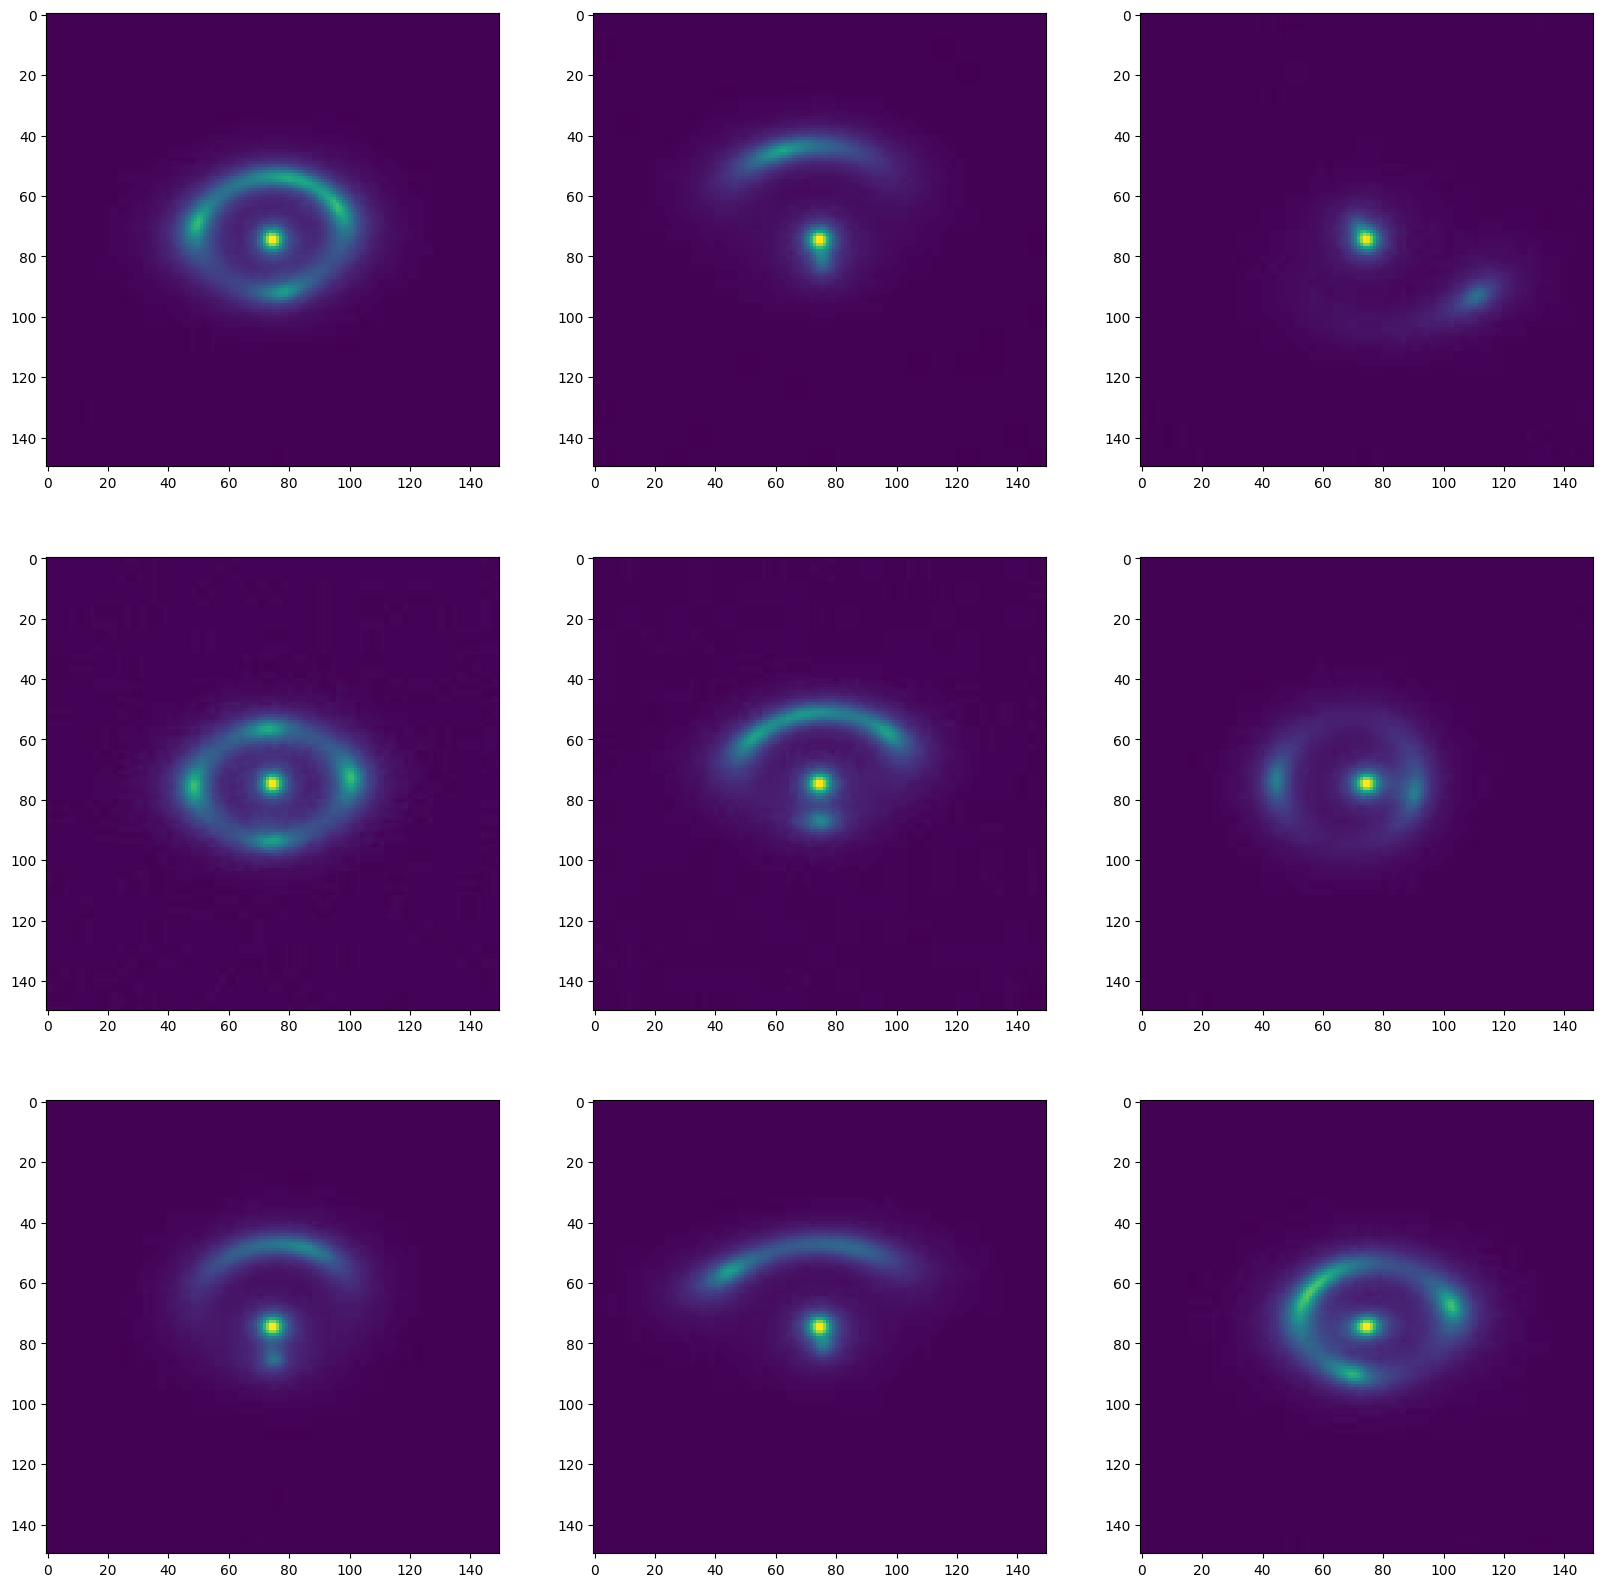

In [13]:
display_multi_images(DIR_SUB)

## Analysis with Without Lens

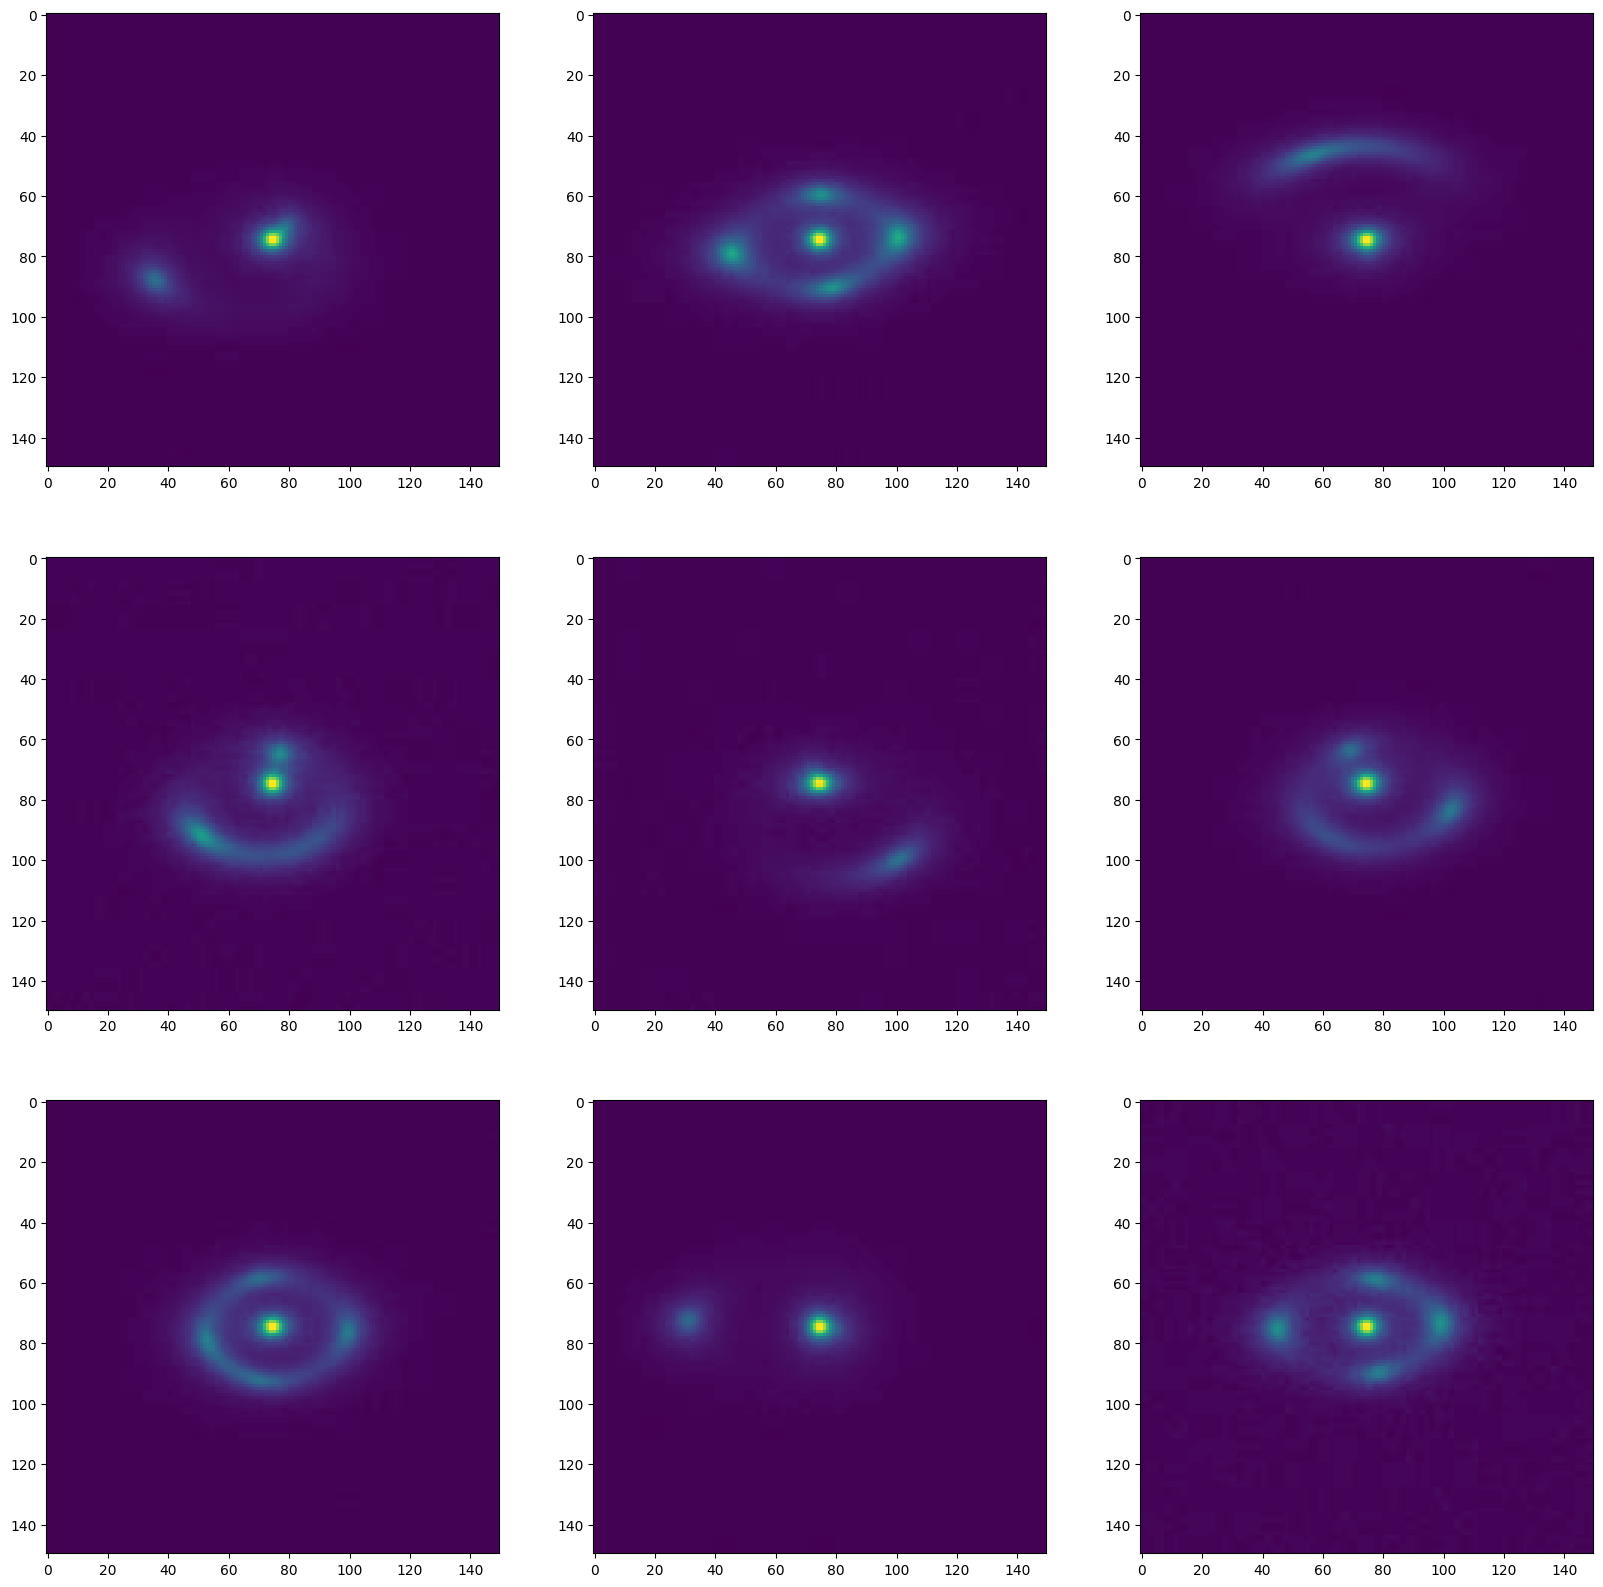

In [14]:
display_multi_images(DIR_NO_SUB)

## Get Mean and std

In [15]:
pos_count = anno_file.loc[anno_file["is_lens"] == 1].shape[0]
neg_count = anno_file.loc[anno_file["is_lens"] == 0].shape[0]
total_count = pos_count+neg_count

pos_count,neg_count,total_count

(12574, 5426, 18000)

In [28]:
mean_img = np.zeros((101,101))
pos_mean_img = np.zeros((101,101))
neg_mean_img = np.zeros((101,101))

mean2_img = np.zeros((101,101))
pos_mean2_img = np.zeros((101,101))
neg_mean2_img = np.zeros((101,101))

for i,ind in tqdm(enumerate(anno_file.index),desc="Read Indexes:- ",total=len(anno_file.index)):
    lbl = anno_file.loc[ind,"is_lens"]
    file_index = anno_file.loc[ind,"ID"]
    fig_path = f"lens_finding/SpaceBasedTraining/files/imageEUC_VIS-{file_index}.fits"
    img = read_fits_file(fig_path)
    
    mean_img += img
    mean2_img += img**2
    if lbl == 1:
        pos_mean_img += img
        pos_mean2_img += img**2
    else:
        neg_mean_img += img
        neg_mean2_img += img**2
        
mean_img = mean_img/total_count
pos_mean_img = pos_mean_img/pos_count
neg_mean_img = neg_mean_img/neg_count

mean2_img = mean2_img/total_count
pos_mean2_img = pos_mean2_img/pos_count
neg_mean2_img = neg_mean2_img/neg_count

std_img = mean2_img - mean_img**2
std_pos_img = pos_mean2_img - pos_mean_img**2
std_neg_img = neg_mean2_img - neg_mean_img**2

Read Indexes:- :   0%|          | 0/18000 [00:00<?, ?it/s]

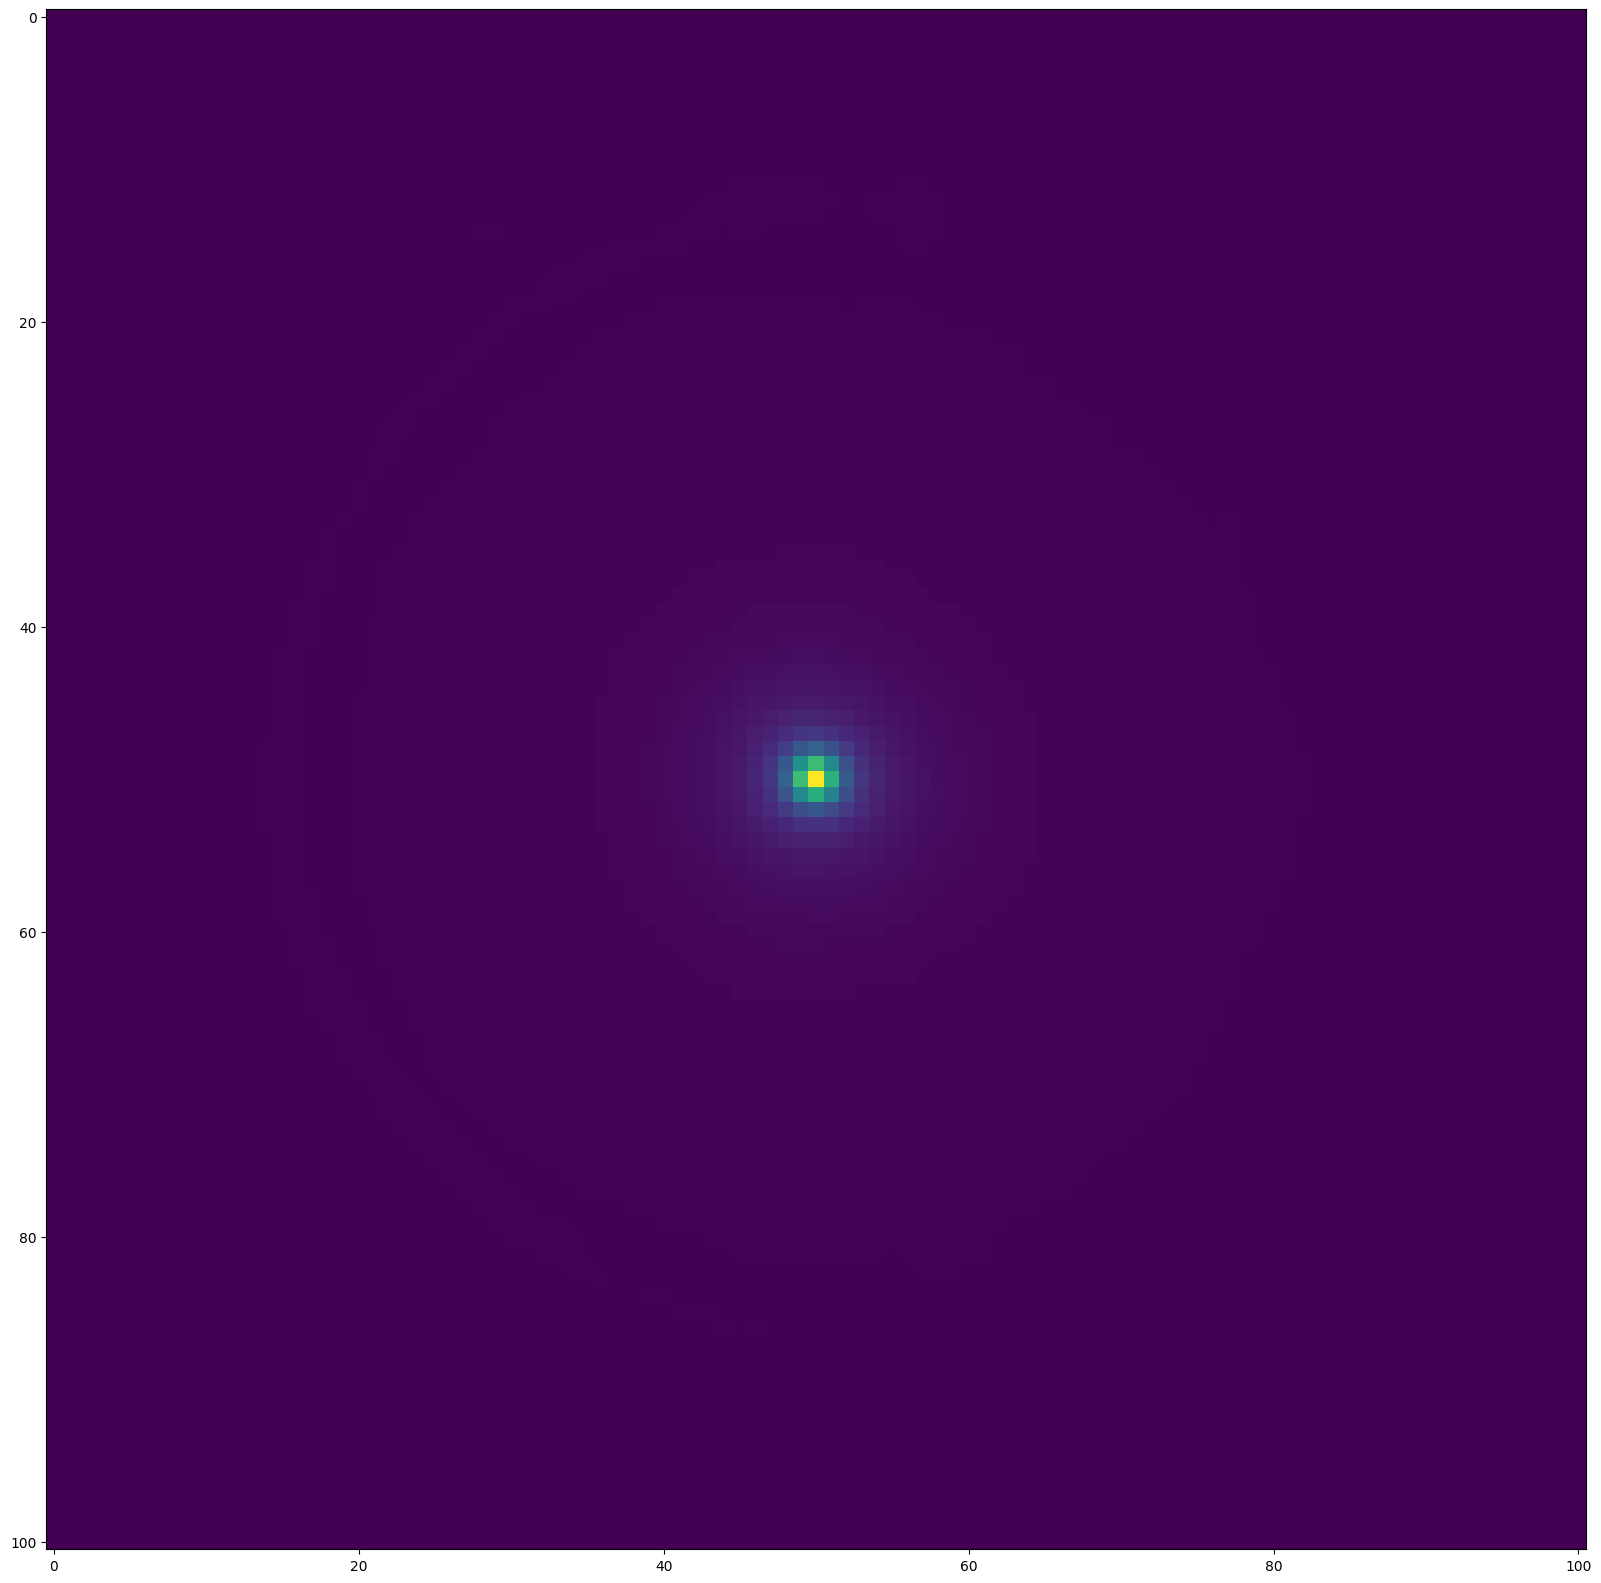

In [29]:
plt.imshow(mean_img)

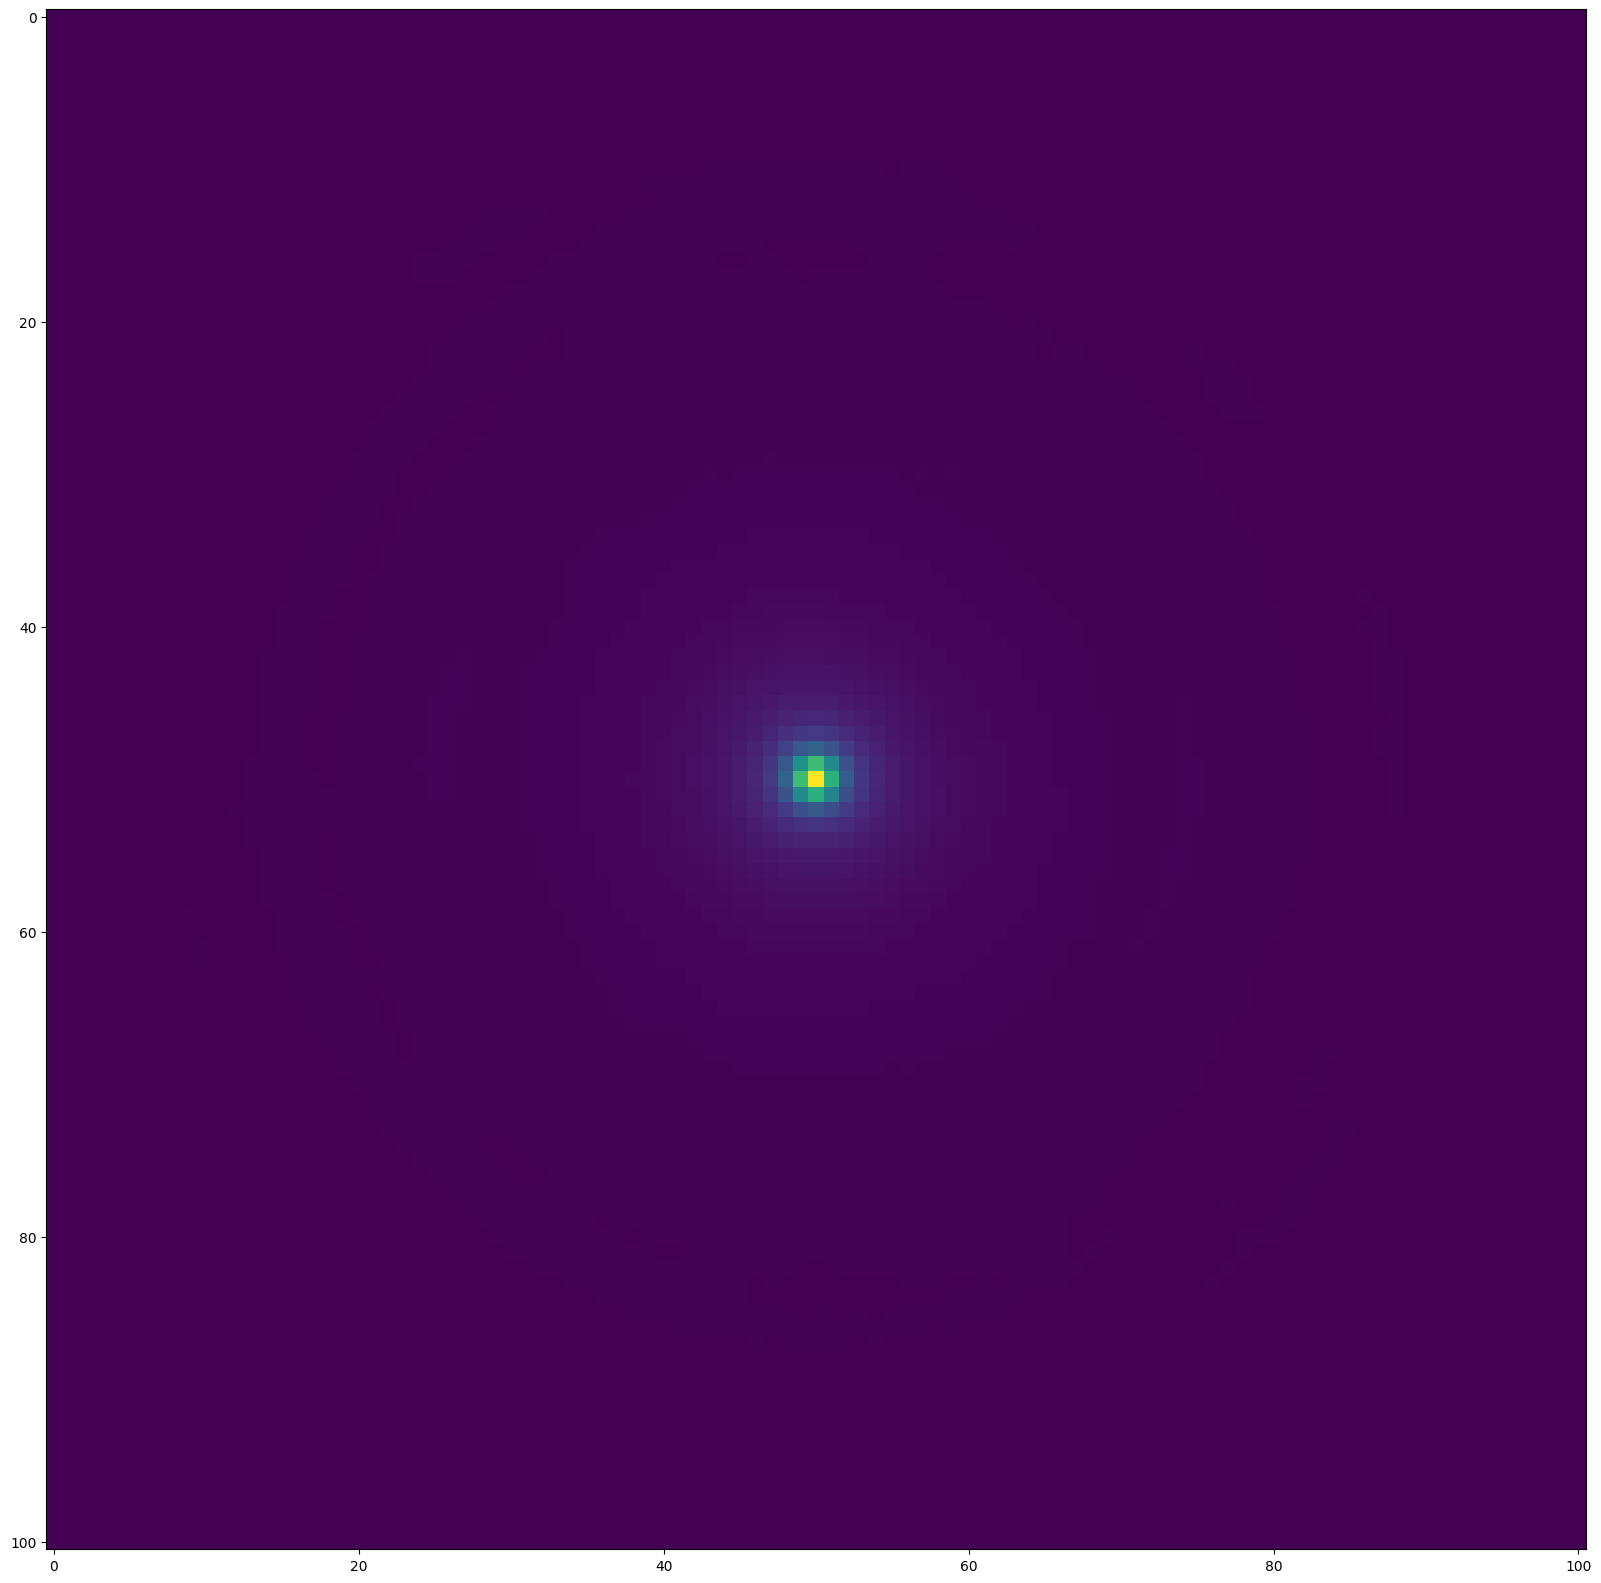

In [30]:
plt.imshow(pos_mean_img)

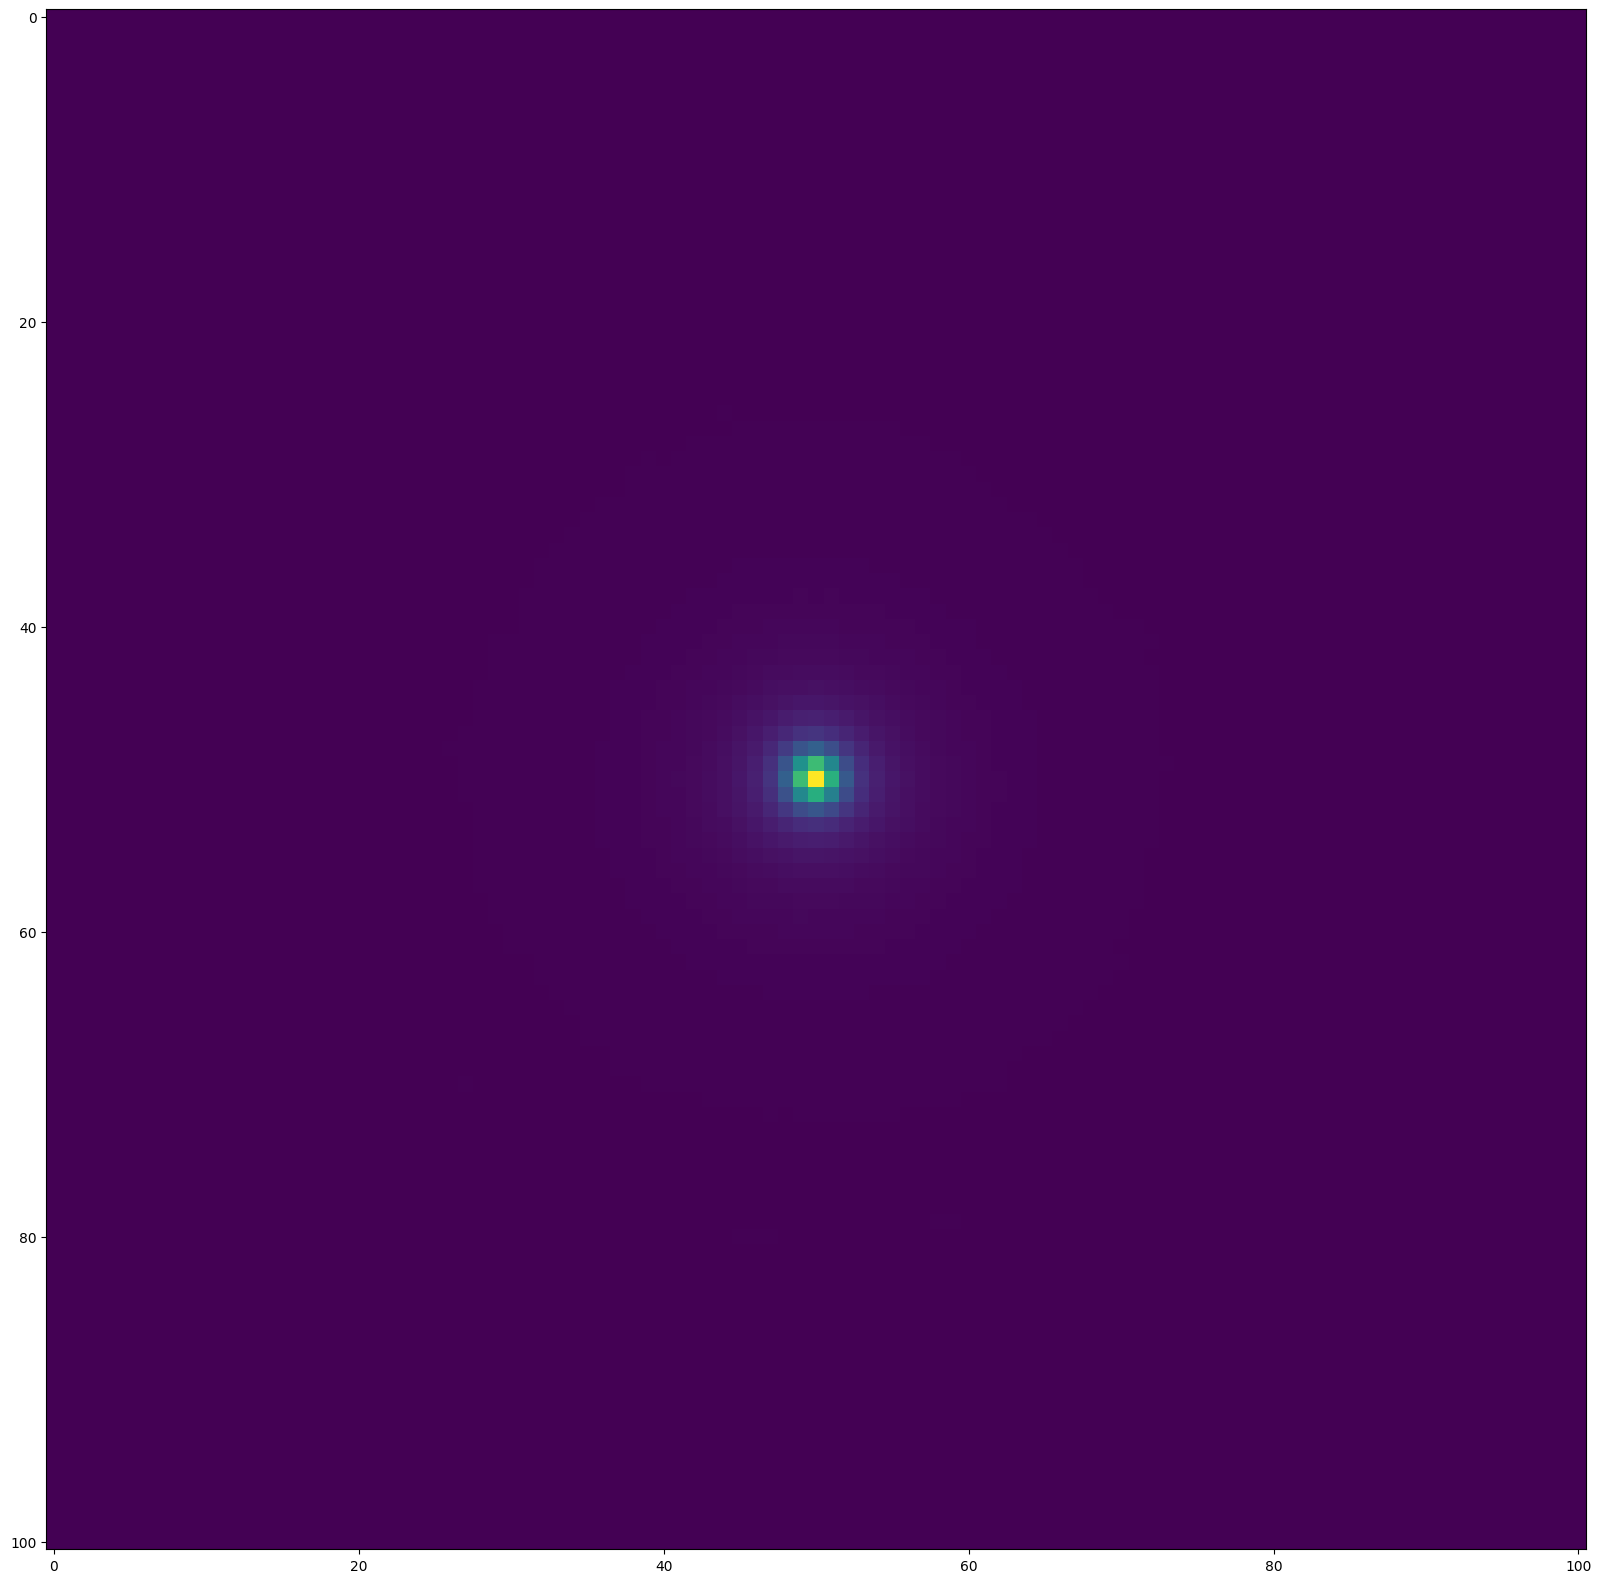

In [31]:
plt.imshow(neg_mean_img)

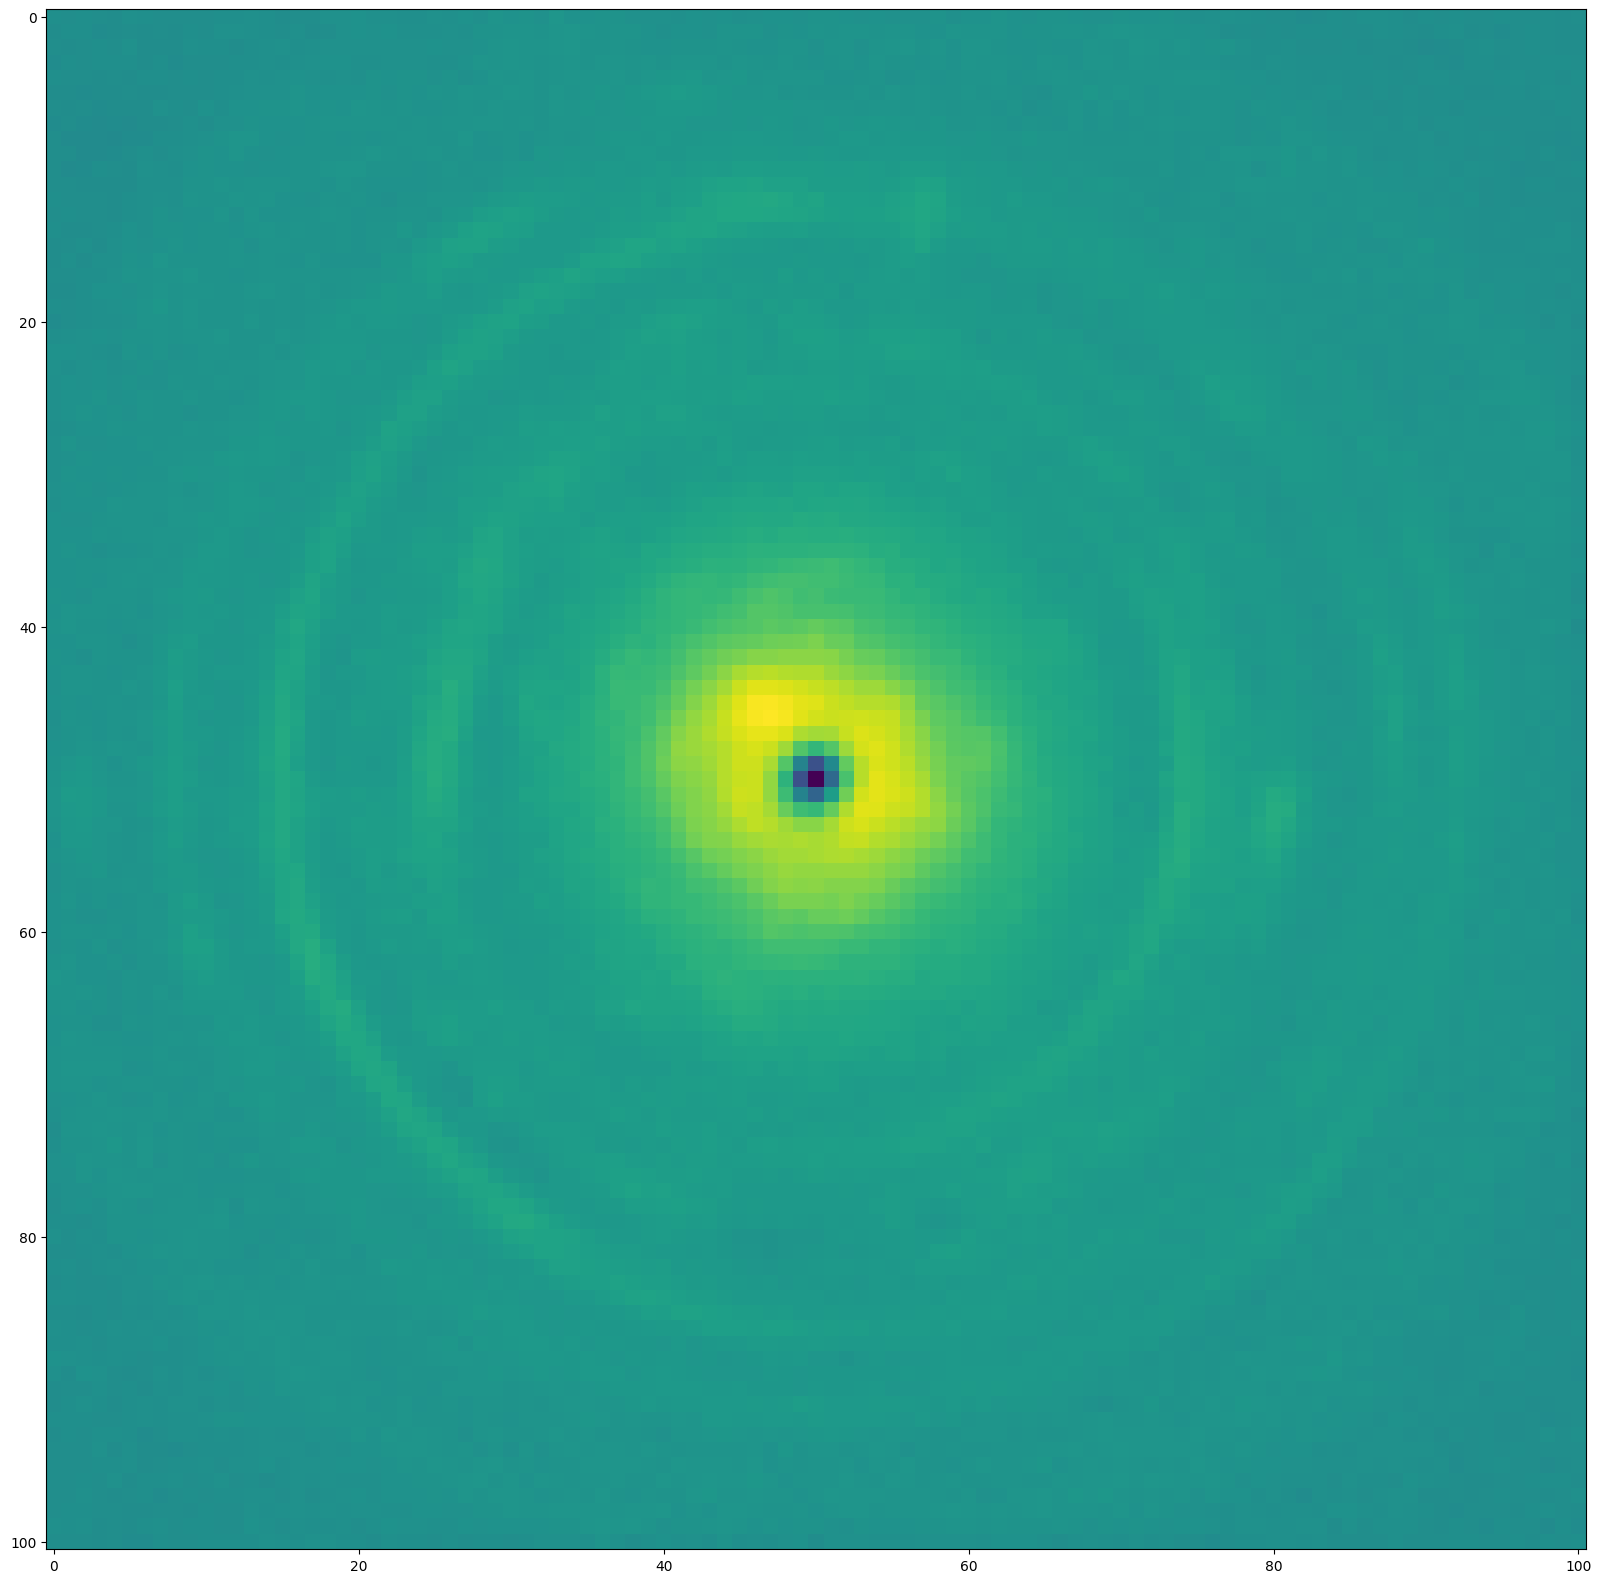

In [32]:
plt.imshow(pos_mean_img - neg_mean_img)

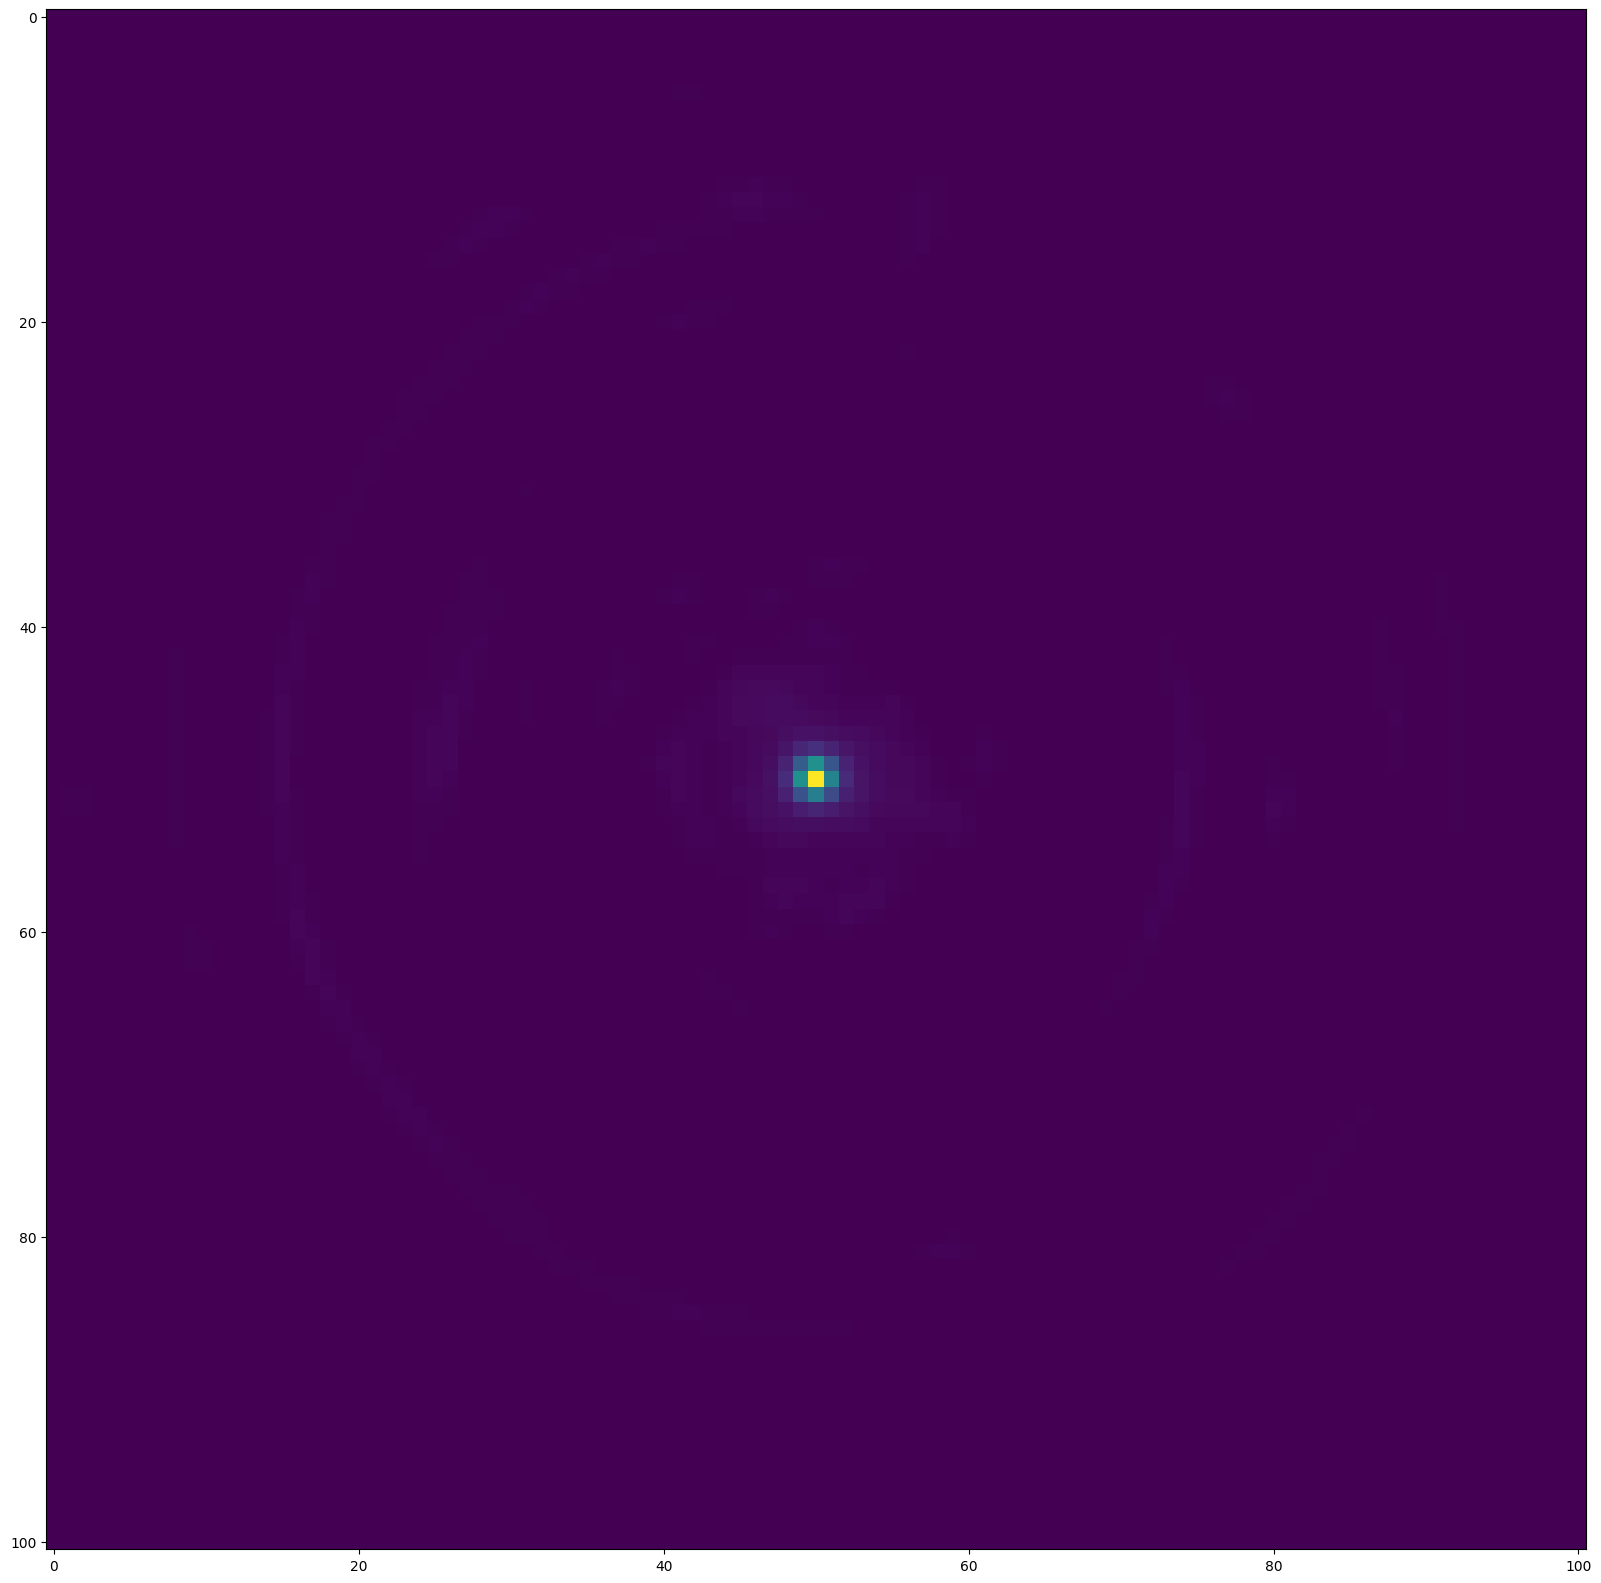

In [33]:
plt.imshow(std_img)

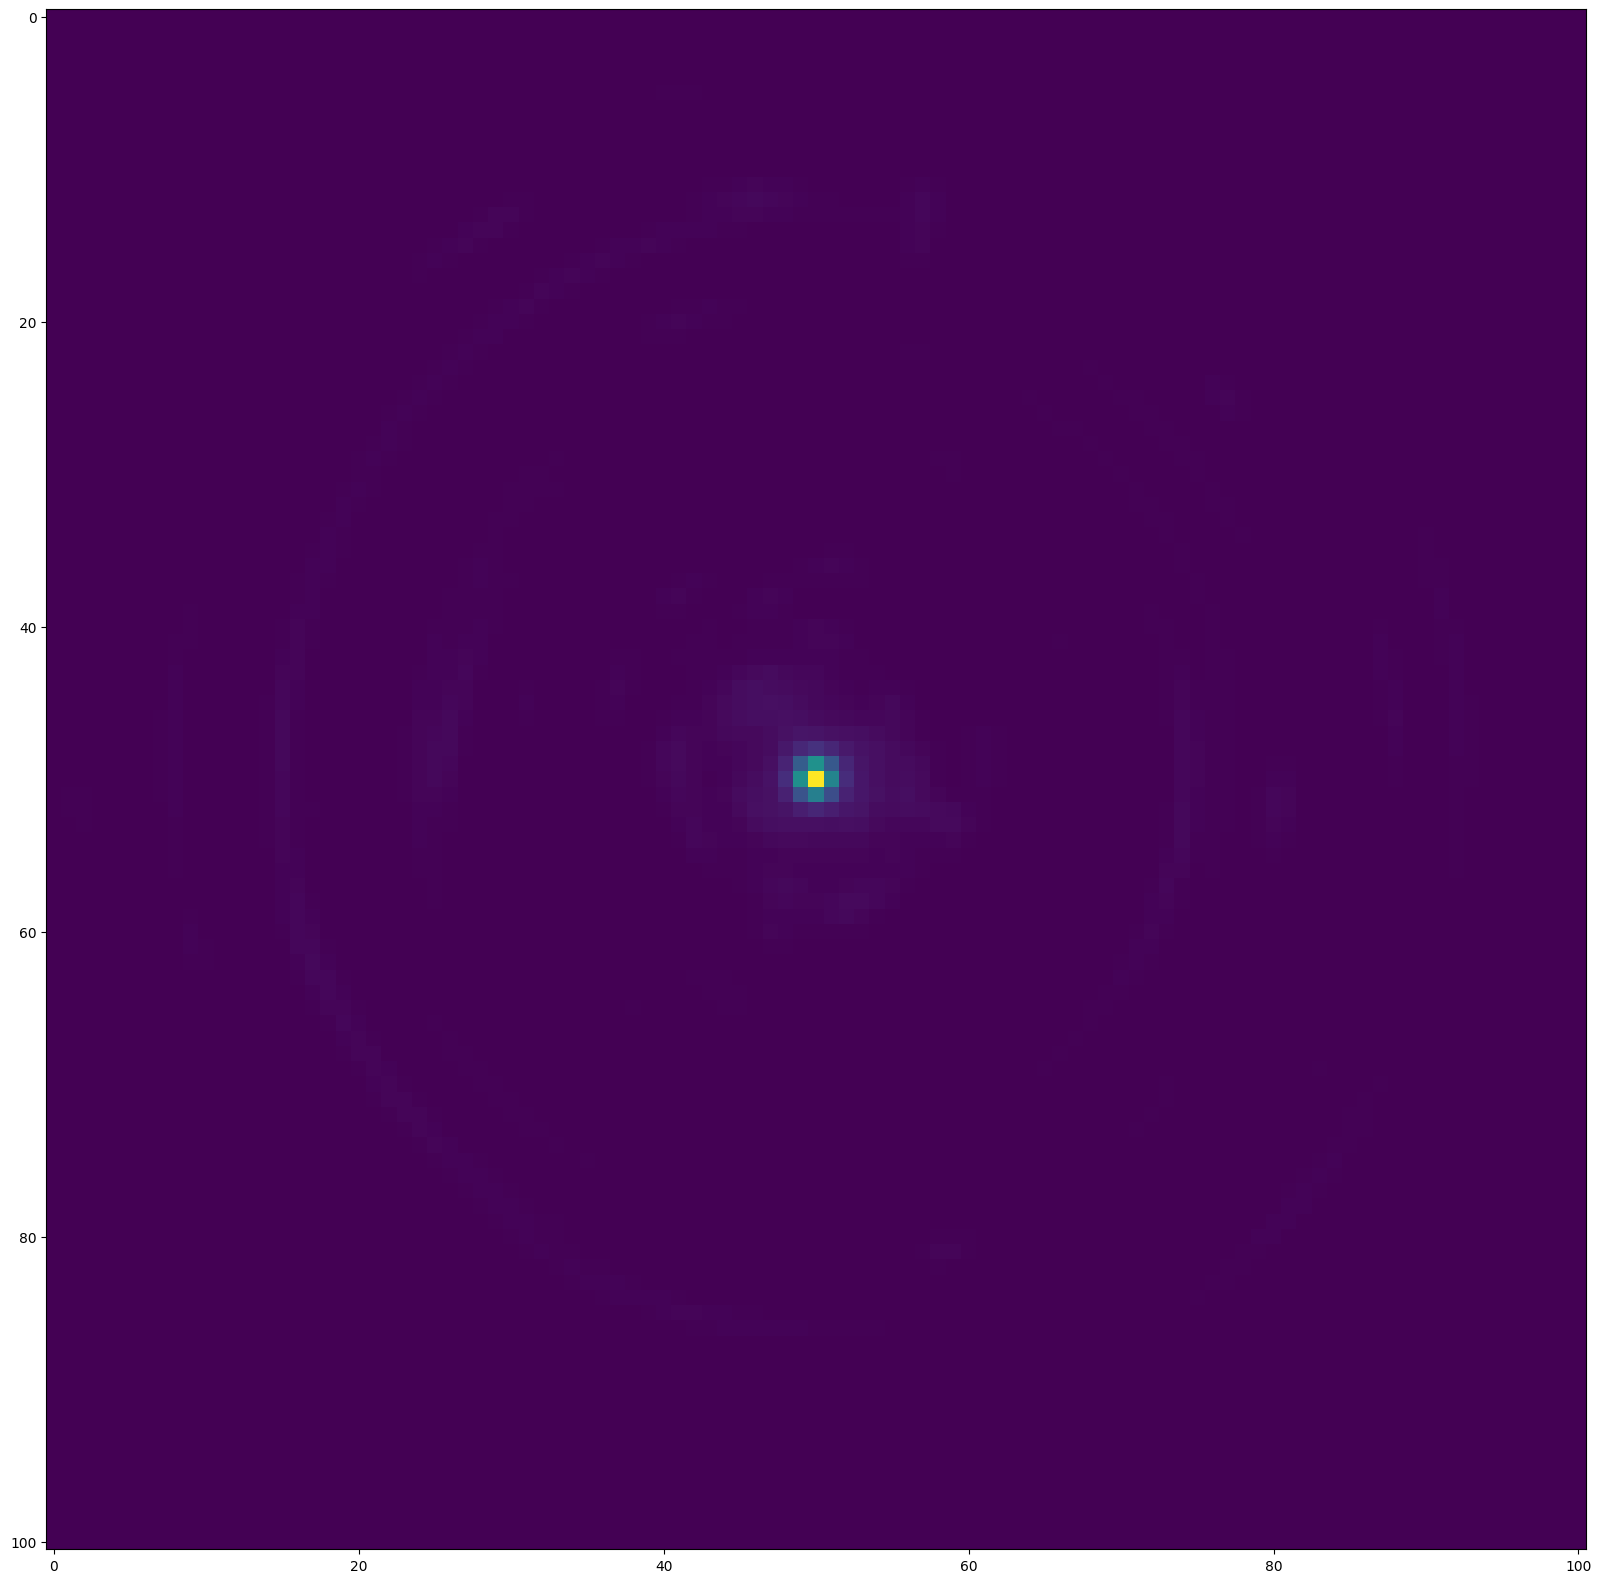

In [35]:
plt.imshow(std_pos_img)

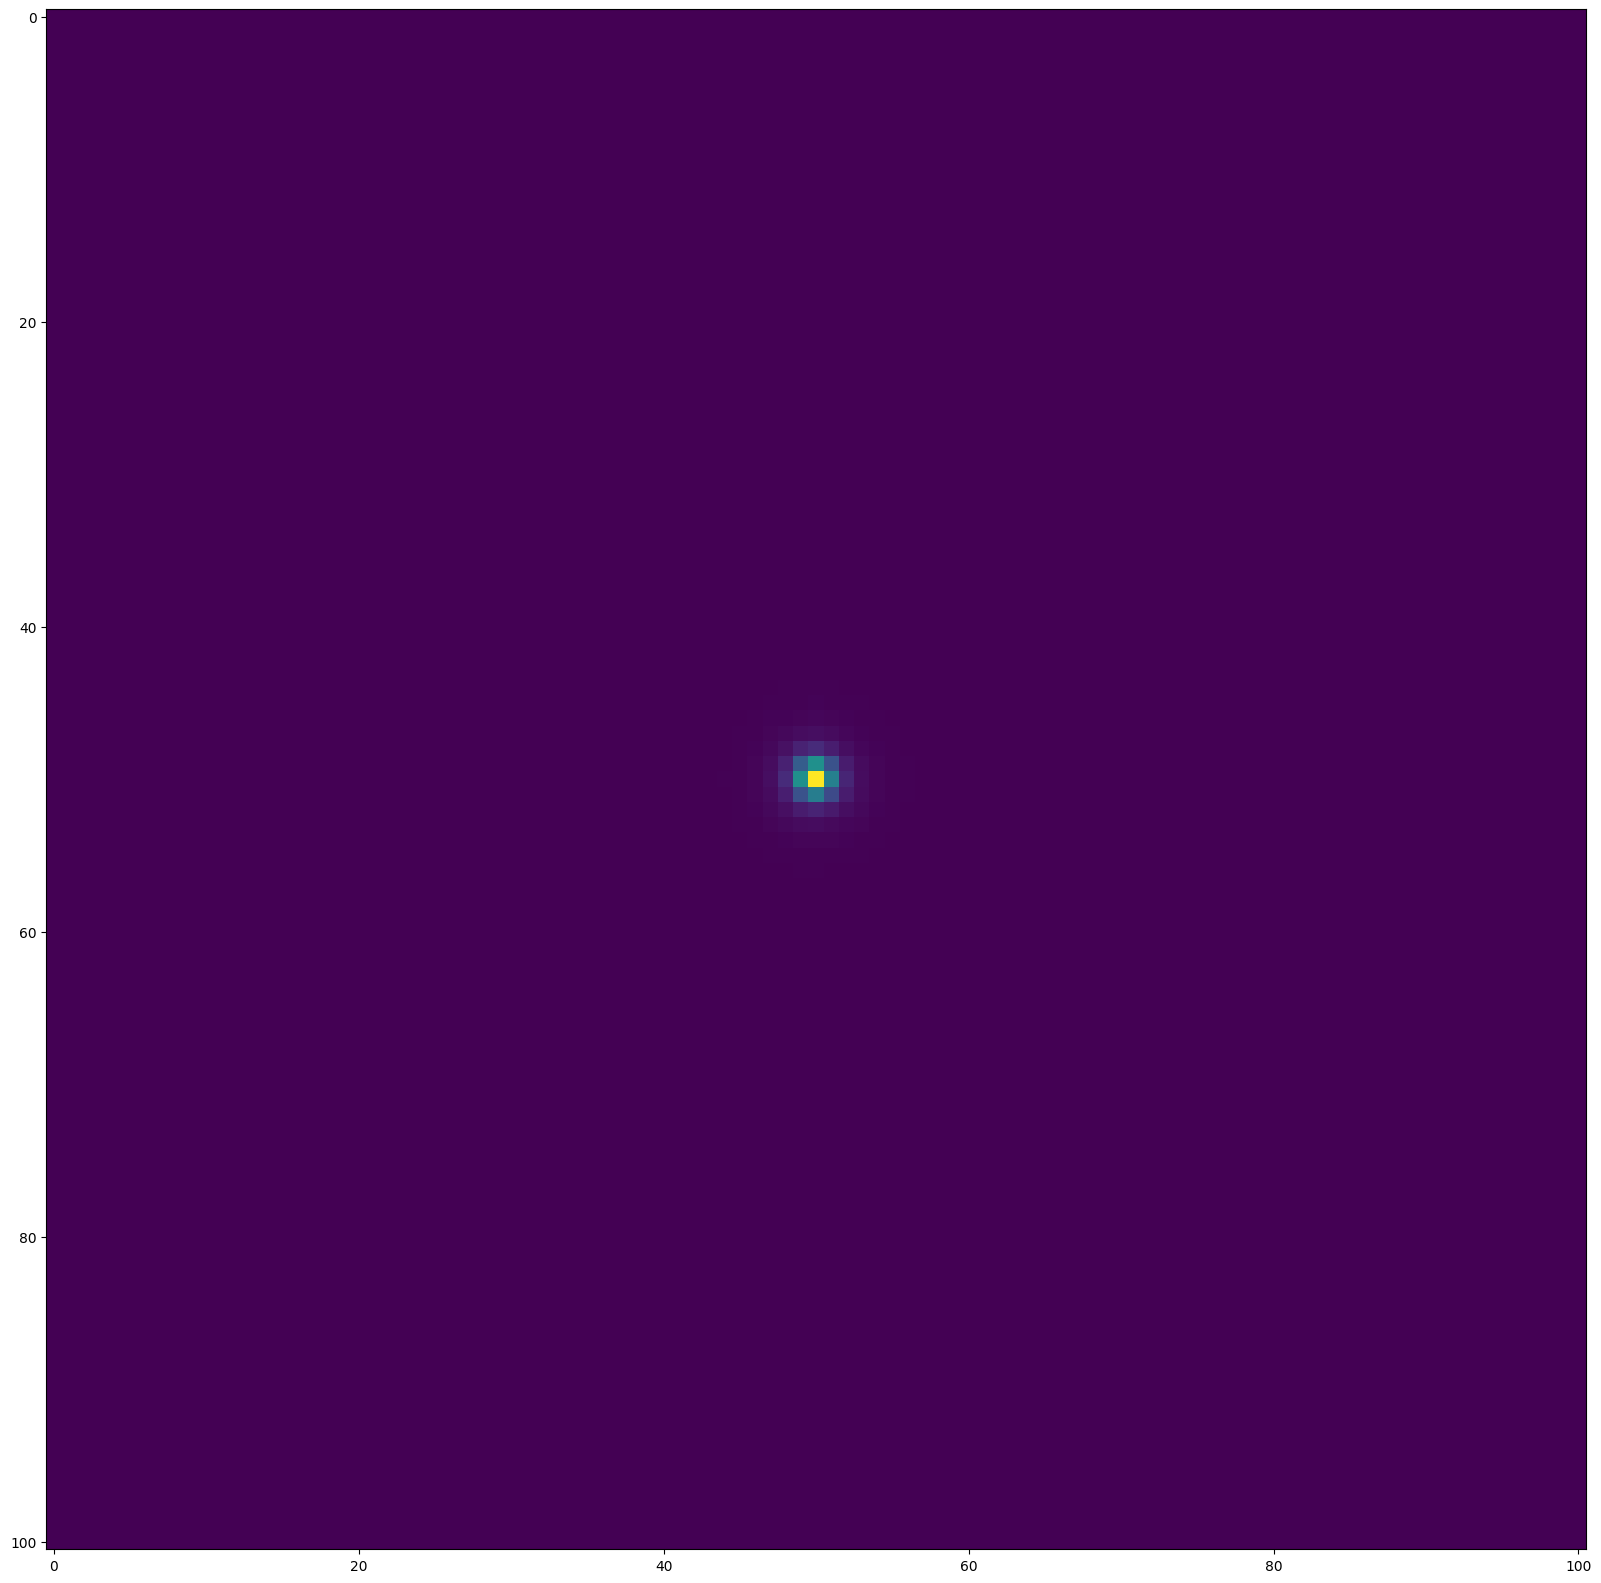

In [36]:
plt.imshow(std_neg_img)

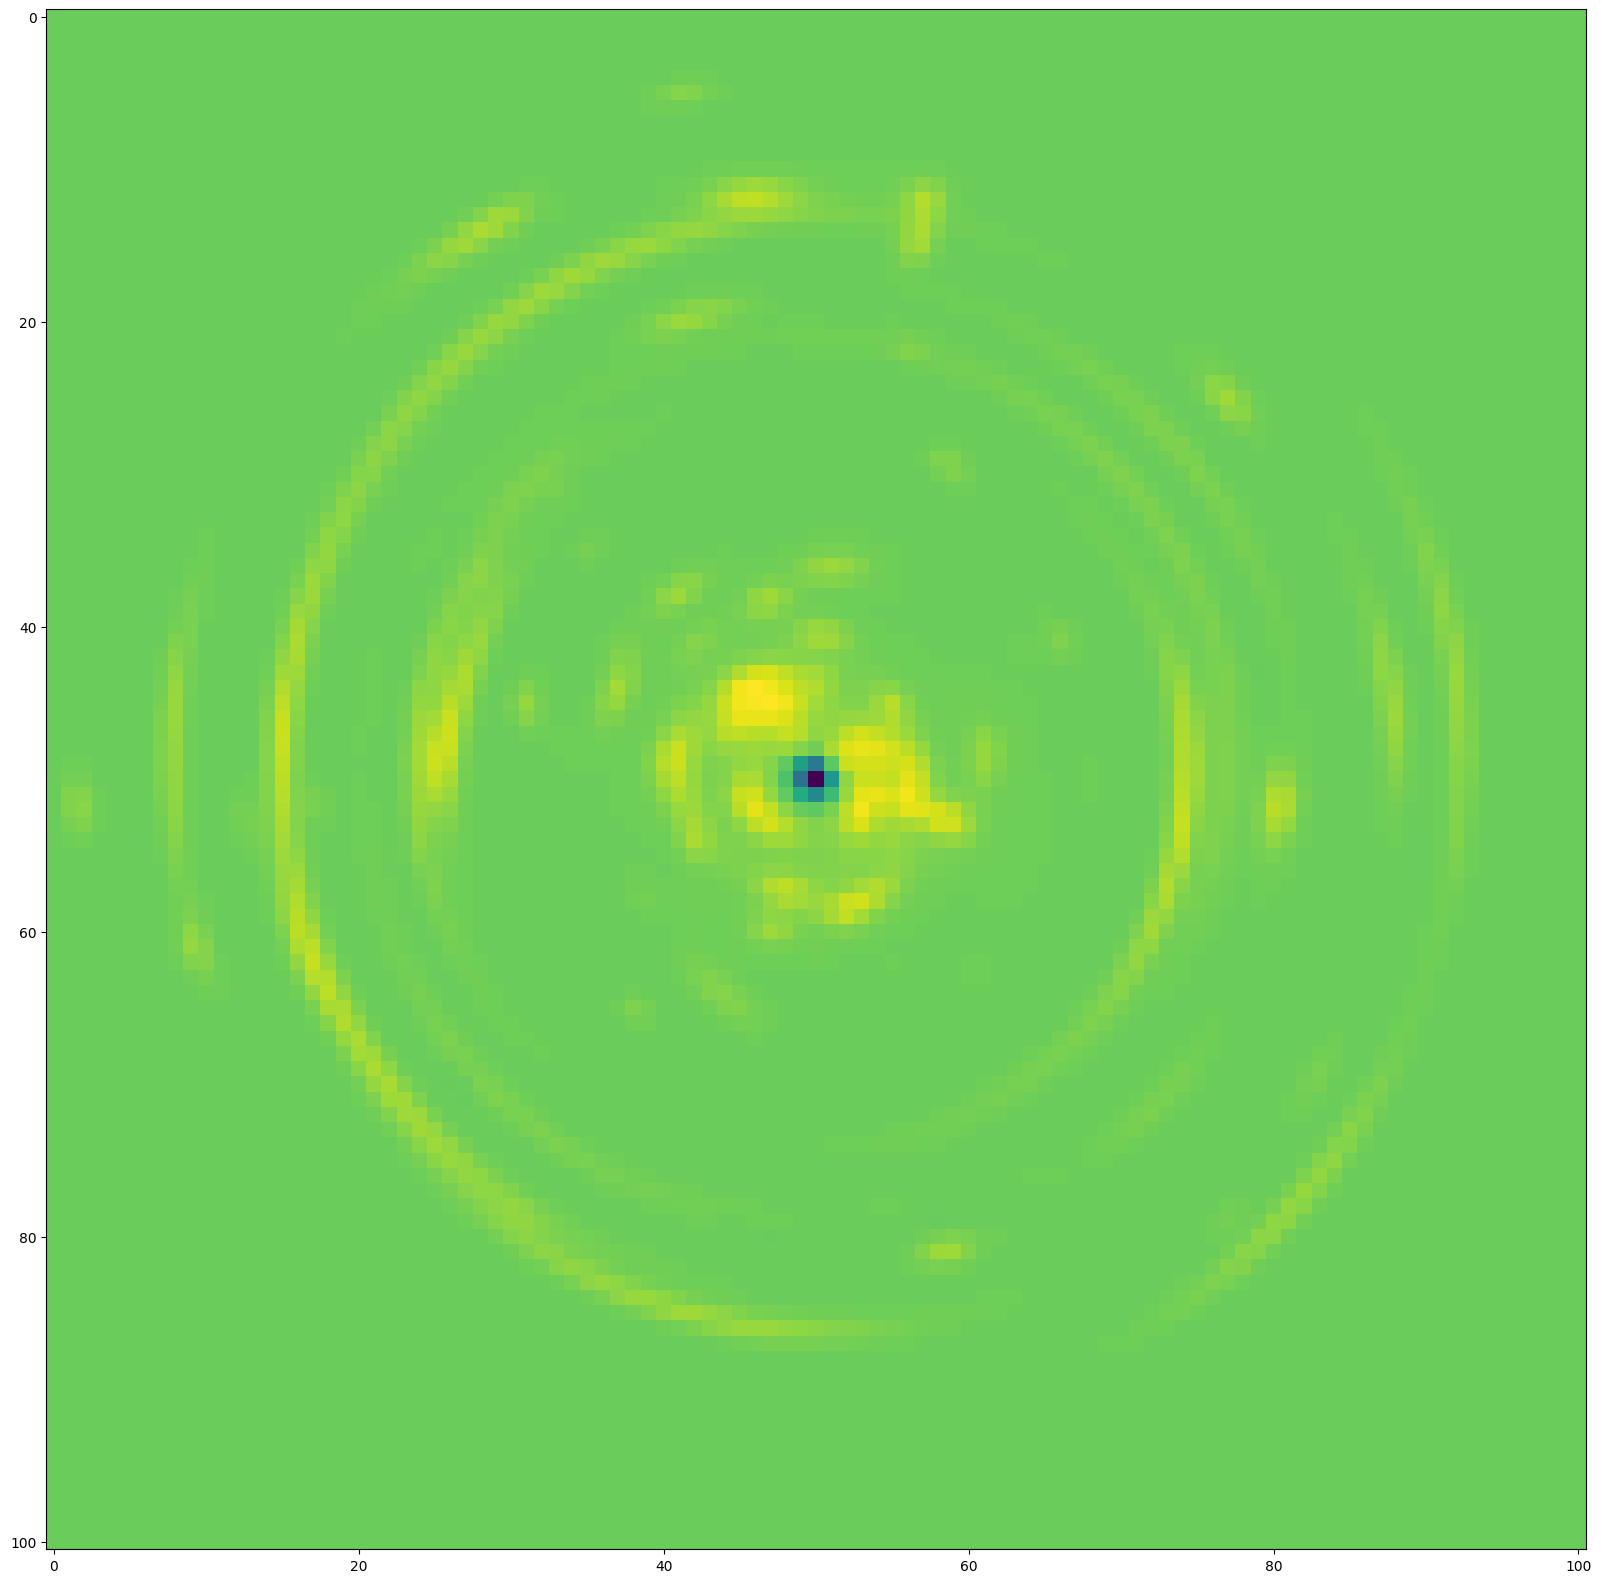

In [37]:
plt.imshow(std_pos_img - std_neg_img)

In [39]:
def display_multi_with_normalization_images(file_list, rows=3,columns=3,m_img=mean_img,s_img=std_img,fig_size=None):
  if fig_size:
    fig = plt.figure(figsize=fig_size)
  else:
    fig = plt.figure()

  
  for i in range(1, columns*rows +1):
    fig_path = f"lens_finding/SpaceBasedTraining/files/imageEUC_VIS-{file_list[i-1]}.fits"
    img = read_fits_file(fig_path)
    
    img = (img - m_img)/s_img
    
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
  plt.show()

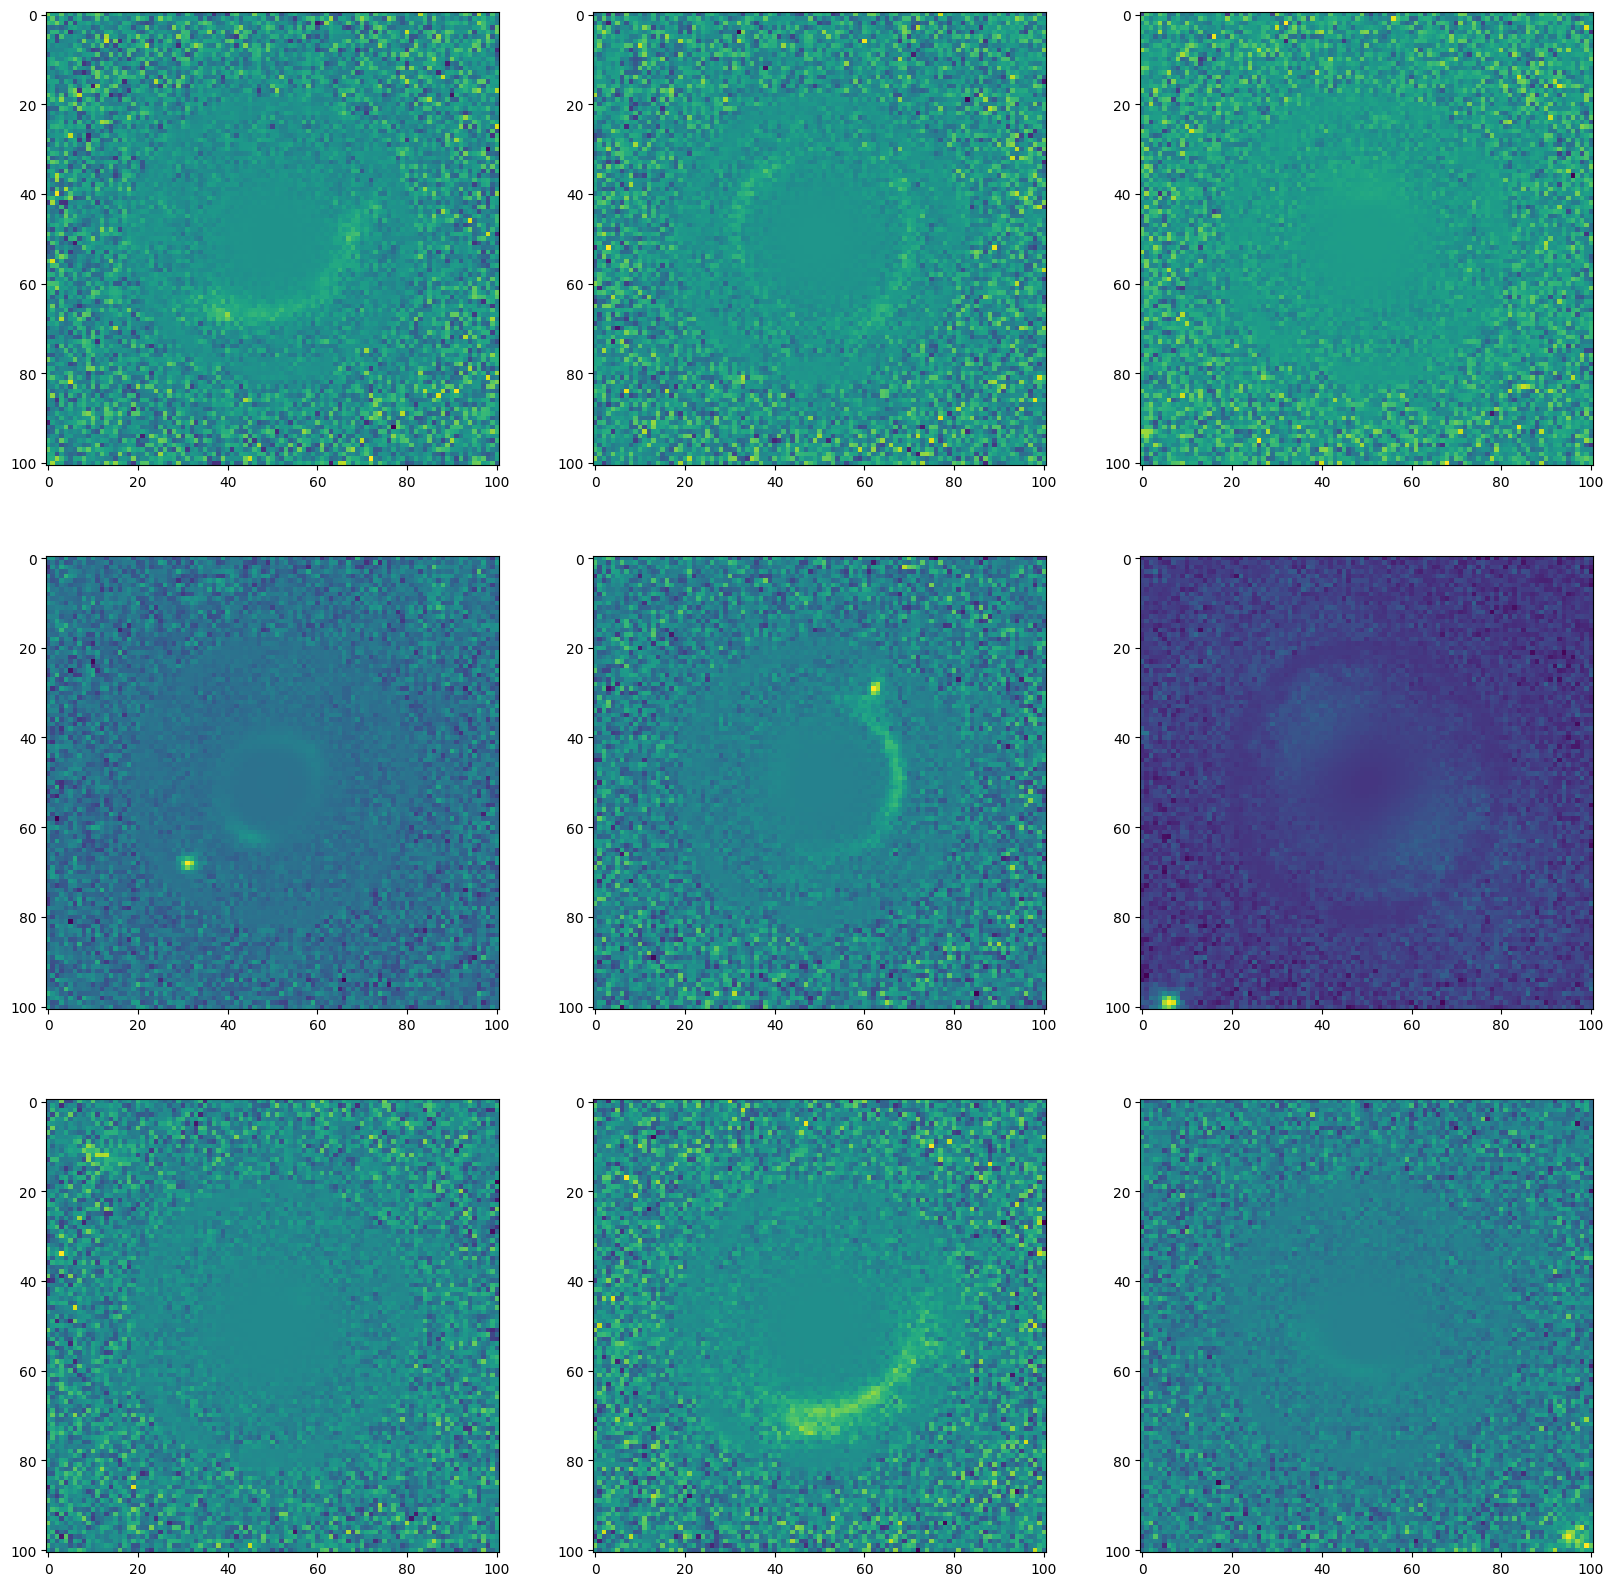

In [44]:
ids = np.random.choice(anno_file.loc[anno_file["is_lens"] == 1]["ID"],15)
display_multi_with_normalization_images(ids,m_img=neg_mean_img,s_img=std_neg_img)

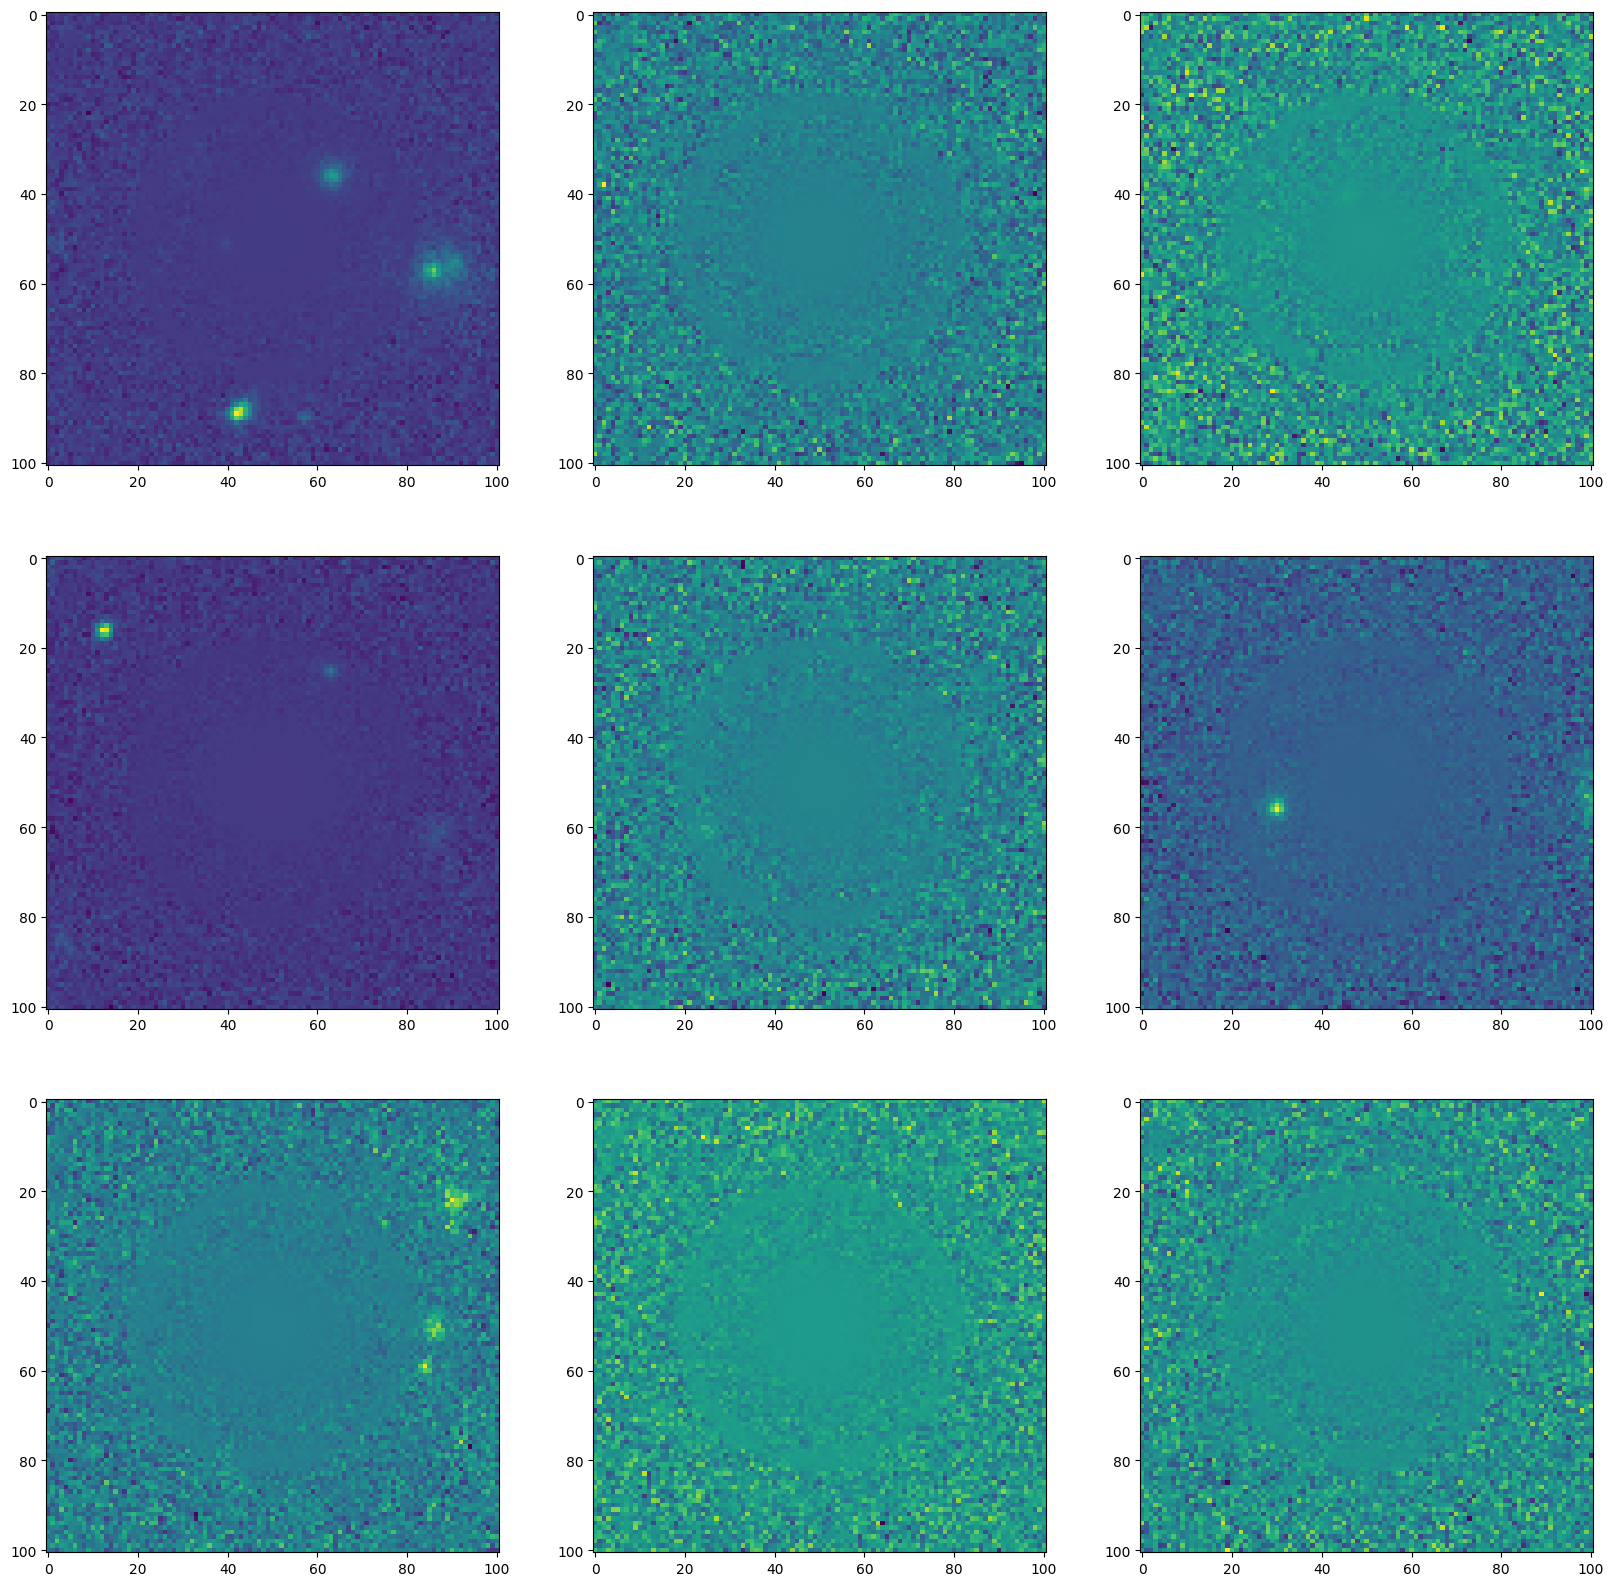

In [45]:
ids = np.random.choice(anno_file.loc[anno_file["is_lens"] == 0]["ID"],15)
display_multi_with_normalization_images(ids,m_img=neg_mean_img,s_img=std_neg_img)

In [47]:
save_arrays = {
    "mean_overall":mean_img,
    "mean_pos":pos_mean_img,
    "mean_neg":neg_mean_img,
    "std_overall":std_img,
    "std_pos":std_pos_img,
    "std_neg":std_neg_img
}

np.savez("image_stats.npz",**save_arrays)